# CLEAR VHEE experiment calculations

Angle calculations for the water tank irradiation experiment at CLEAR.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def getAngleAndSize(beta_entrance, beta_centre, emittance, distance):
    '''
    Calculate the angle of the beam cone

    Inputs:
    - beta_entrance:  beta at the beginning of the box
    - beta_centre:    beta at the waist 
    - emittance
    - distance:       distance between the two points where the betas are calculated

    Outputs:
    - angle:          the beam angle
    - size:           the beam minimum size

    Last modified: 10.09.2018 by Eugenio Senes
    '''
    angle = np.degrees(np.arctan(np.sqrt(emittance*(beta_entrance-beta_centre))/distance))
    size = 2*np.sqrt(beta_centre*emittance)
    return angle, size


In [3]:
getAngleAndSize(20, 1e-3, 4e-6, 0.15)

(3.4123345766938726, 0.00012649110640673518)

Ok, let's take a more analytical approach. The $\beta$ function in an insertion is 
$$\beta(s) = \beta_0 + \frac{s^2}{\beta_0}$$

In [4]:
def beta_IP(s, beta0):
    return beta0 + (s**2/beta0)

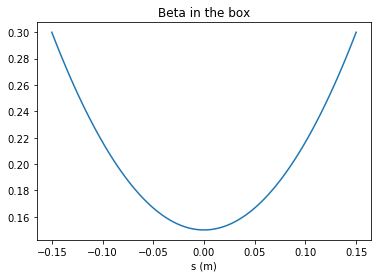

In [5]:
xx = np.linspace(-0.15, 0.15, 100)
yy = beta_IP(xx, 0.15)
plt.plot(xx,yy,'-')
plt.xlabel('s (m)')
plt.title('Beta in the box')

In [6]:
getAngleAndSize(0.3, 0.15, 10e-6, 0.15)

(0.46780768519867444, 0.0024494897427831783)

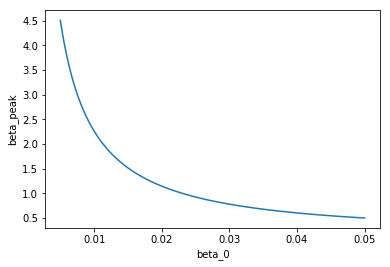

In [7]:
param = np.linspace(5e-3, .05, int(1e5))
plt.plot(param, beta_IP(0.15, param))
plt.xlabel('beta_0')
plt.ylabel('beta_peak')

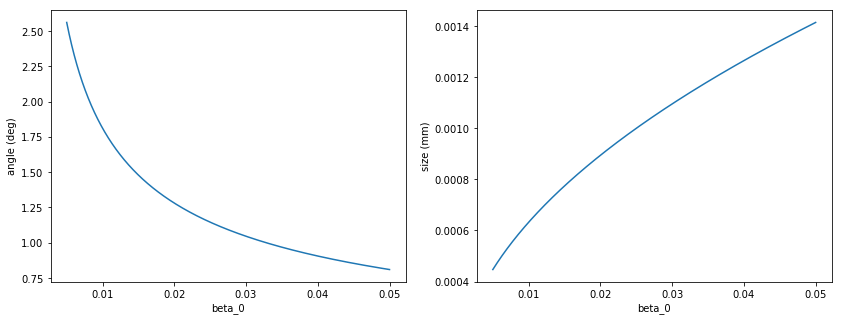

In [8]:
angle, size = getAngleAndSize(beta_IP(0.15, param), param, 10e-6, 0.15)
fig, ax = plt.subplots(1,2,figsize=(14,5))
ax[0].plot(param, angle)
ax[0].set_xlabel('beta_0')
ax[0].set_ylabel('angle (deg)')

ax[1].plot(param, size)
ax[1].set_xlabel('beta_0')
ax[1].set_ylabel('size (mm)')

In [9]:
'''
Ok so it looks that to get a 1.8 degree angle we need:
- beta0 = 10 mm
- beta_max = 2-2.5 m 
and get a 0.5 mm beam at the waist
'''

'\nOk so it looks that to get a 1.8 degree angle we need:\n- beta0 = 10 mm\n- beta_max = 2-2.5 m \nand get a 0.5 mm beam at the waist\n'

In [202]:
b0 = np.array([1e-3, 1.5e-3, 2e-3, 3.3e-3, 4e-3, 5e-3, 8e-3, 1e-2, 2e-2, 5e-2, 1e-1, .8])
print(beta_IP(0.15, b0))
print(getAngleAndSize(beta_IP(0.15, b0), b0, 4e-6, 0.15)[0])

[ 22.501       15.0015      11.252        6.82148182   5.629        4.505
   2.8205       2.26         1.145        0.5          0.325        0.828125  ]
[ 3.61888323  2.95611554  2.56063897  1.99397761  1.81124805  1.62013742
  1.28095911  1.14576284  0.81023067  0.51245537  0.3623655   0.12811704]


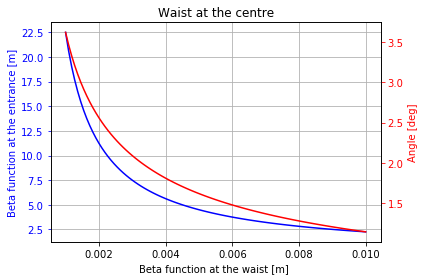

In [11]:
fig, ax1 = plt.subplots()
b0 = np.linspace(1e-3, 1e-2,100)
s1 = beta_IP(0.15, b0)
ax1.plot(b0, s1, 'b-')
ax1.set_xlabel('Beta function at the waist [m] ')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Beta function at the entrance [m]', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2, ff = getAngleAndSize(beta_IP(0.15, b0), b0, 4e-6, 0.15)
ax2.plot(b0, s2, 'r-')
ax2.set_ylabel('Angle [deg]', color='r')
ax2.tick_params('y', colors='r')

ax1.set_title('Waist at the centre')

fig.tight_layout()
ax1.grid()
plt.show()

fig.savefig('angle_vs_beta0.eps', format='eps',dpi=100)

# Ok let's check the madx output

In [12]:
import sys
sys.path.append('/Users/esenes/cernbox')
import metaclass

from scipy.optimize import curve_fit

In [203]:
mc = metaclass.twiss('check.twiss')
mc = metaclass.twiss('final.twiss')

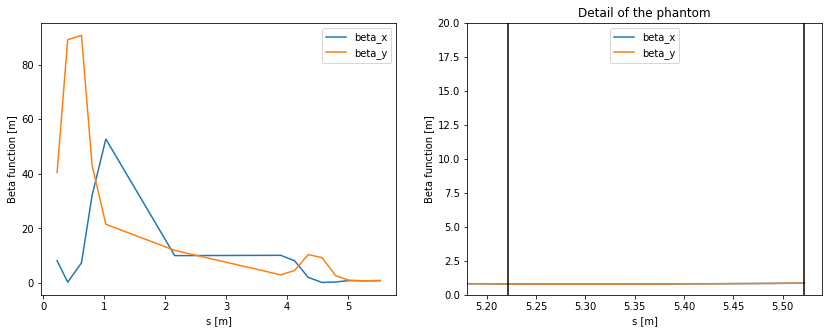

In [204]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(mc.S, mc.BETX,label='beta_x')
ax[0].plot(mc.S, mc.BETY,label='beta_y')

ax[0].legend(frameon=True)
ax[0].set_xlabel('s [m]')
ax[0].set_ylabel('Beta function [m]')

ax[1].set_title('Detail of the phantom')
ax[1].plot(mc.S, mc.BETX,label='beta_x')
ax[1].plot(mc.S, mc.BETY,label='beta_y')
ax[1].legend(frameon=True)
ax[1].set_xlabel('s [m]')
ax[1].set_ylabel('Beta function [m]')
ax[1].set_xlim(5.18, 5.54)
ax[1].set_ylim(0,20)
ax[1].axvline(x=5.222,color='k')
ax[1].axvline(x=5.522,color='k')

fig.savefig('flat_2deg_tmp.eps', format='eps',dpi=100)

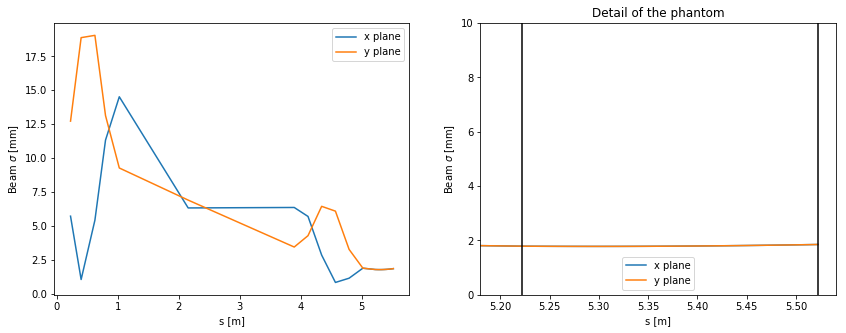

In [205]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(mc.S, 1e3*np.sqrt(4e-6*mc.BETX),label='x plane')
ax[0].plot(mc.S, 1e3*np.sqrt(4e-6*mc.BETY),label='y plane')

ax[0].legend(frameon=True)
ax[0].set_xlabel('s [m]')
ax[0].set_ylabel('Beam $\sigma$ [mm]')

ax[1].set_title('Detail of the phantom')
ax[1].plot(mc.S, 1e3*np.sqrt(4e-6*mc.BETX),label='x plane')
ax[1].plot(mc.S, 1e3*np.sqrt(4e-6*mc.BETY),label='y plane')
ax[1].legend(frameon=True)
ax[1].set_xlabel('s [m]')
ax[1].set_ylabel('Beam $\sigma$ [mm]')
ax[1].set_xlim(5.18, 5.54)
ax[1].set_ylim(0,10)
ax[1].axvline(x=5.222,color='k')
ax[1].axvline(x=5.522,color='k')

fig.savefig('flat_2deg_size_tmp.eps', format='eps',dpi=100)

In [187]:
1e3*np.sqrt(4e-6*60)

15.491933384829668

Waist at 5.37281772861 m 
Beta at the waist 0.00202324593406 m


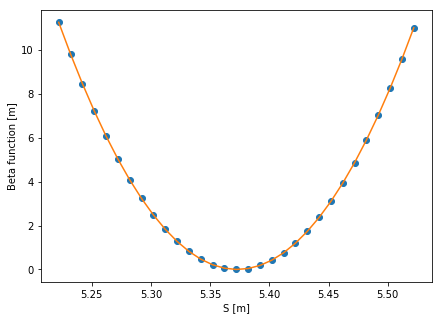

In [154]:
# fit a parabula to find the waist
sdata = [];
betax = [];
betay = [];
for k in np.linspace(14,74,31):
#     print(mc.NAME[int(k)])
    sdata.append(mc.S[int(k)])
    betax.append(mc.BETX[int(k)])
    betay.append(mc.BETY[int(k)])
sdata = np.array(sdata);#casting shit
betax = np.array(betax);
betay = np.array(betay); 

#plotting and fitting
xx = sdata
yy = betax

fig, ax = plt.subplots(1, figsize=(7,5))
ax.plot(xx, yy,'o')
# ax.plot(sdata, betay,label='beta_y')
# ax.legend(frameon=True)
ax.set_xlabel('S [m]')
ax.set_ylabel('Beta function [m]')

def beta_IP2(s, s0, beta0):
    return beta0 + ((s-s0)**2/beta0)

popt, pcov = curve_fit(beta_IP2, xx, yy, p0=[5.38, 1e-2], bounds=([5.3, 0],[5.45,0.1]))
ax.plot(xx, beta_IP2(xx, *popt)) 
print('Waist at '+str(popt[0])+' m ')
print('Beta at the waist '+str(popt[1])+' m')

In [155]:
angle, size = getAngleAndSize(yy[0], popt[1], 4e-6, popt[0]-5.222)

In [156]:
angle

2.5459058070978222

$$
tan(\theta) = \frac{\sqrt{\epsilon_x (\beta_\text{entrance} - \beta_\text{centre})}}{l} \sim \frac{\sqrt{\epsilon_x \beta_\text{entrance}}}{l}
$$

In [166]:
16.8*1.37

23.016000000000002

In [352]:
16.8*1.05

17.64

In [391]:
np.array([12.22, 14.18, 16.79, 17.33, 16.56, 21.67])/16.8

array([ 0.72738095,  0.84404762,  0.99940476,  1.03154762,  0.98571429,
        1.28988095])

In [206]:
np.array([1.52799e+01,-1.51296e+01,1.32934e+01,1.37967e+01,-1.47313e+01,2.15707e+01])/16.8

array([ 0.90951786, -0.90057143,  0.79127381,  0.82123214, -0.8768631 ,
        1.28397024])

In [170]:
np.array([12.33, 15.43, 16.90, 15.98, 15.68, 21.87])/16.8

array([ 0.73392857,  0.91845238,  1.00595238,  0.95119048,  0.93333333,
        1.30178571])